In [12]:
import pandas as pd
import os
import numpy as np
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from pylab import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [13]:
file_plotcdf = []

for f in os.listdir('tune/'):
    if 'xshift_v5_31' in f:
        file_plotcdf.append(f)

In [14]:
file_plotcdf

['glass_1_64onehone_xshift_v5_31.csv',
 'pen_0.5_128onehone_xshift_v5_31.csv',
 'veh_0.5_64onehone_xshift_v5_31.csv',
 'satimage_0.5_64onehone_xshift_v5_31.csv',
 'ecoli_0.5_64onehone_xshift_v5_31.csv',
 'veh_1_64onehone_xshift_v5_31.csv',
 'satimage_1_64onehone_xshift_v5_31.csv',
 'pen_1_128onehone_xshift_v5_31.csv',
 'ecoli_1_64onehone_xshift_v5_31.csv',
 'letter_0.5_256onehone_xshift_v5_31.csv',
 'glass_0.5_64onehone_xshift_v5_31.csv',
 'opt_0.5_64onehone_xshift_v5_31.csv',
 'page_0.5_64onehone_xshift_v5_31.csv',
 'page_1_64onehone_xshift_v5_31.csv',
 'opt_1_64onehone_xshift_v5_31.csv',
 'yeast_1_64onehone_xshift_v5_31.csv',
 'yeast_0.5_64onehone_xshift_v5_31.csv']

In [ ]:
# veh, opt,pen,letter 


In [5]:
datalist = [
    'veh',
    'glass',
    'ecoli',
    'yeast',
    'satimage',
    'opt',
    'page',
    'pen',
    'letter',

]
dm_file_list = []
for name in datalist:
    name_file = []
    for f in file_plotcdf:
        if name in f:
            name_file.append(f)
    dataframe_list = []
    for f in name_file:
        try:
            float(f.split('_')[1])
            
        except:
            if 'dm' not in f:
                dm_file_list.append(f)
            continue
        dataframe_list.append(pd.read_csv('tune/' + f))
#     print('tune/' + f)
#     print(dataframe_list[0])
    columns_name = list(dataframe_list[0].columns[1:])
    model_list = list(dataframe_list[0]['model'])
    print(model_list)
    frame = {}
    frame['model'] = model_list
    print(len(frame['model']))
    for col in columns_name:
#         if col.split('_')[-1]==str(0.9) or col.split('_')[-1]==str(0.7):
#             continue
        result_list = []
        ips = dataframe_list[0][col][0]
        result_list.append(ips)
        snips = dataframe_list[0][col][1]
        result_list.append(snips)
        
        ips = dataframe_list[0][col][2]
        result_list.append(ips)
        snips = dataframe_list[0][col][3]
        result_list.append(snips)
        
        
        
        
        #dm
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][4])
        min_index = np.argmin(dm_list)
        dmrobust = dataframe_list[min_index][col][4]
        result_list.append(dmrobust)
        dmdr = dataframe_list[min_index][col][5]
        result_list.append(dmdr)
        sndmdr = dataframe_list[min_index][col][6]
        result_list.append(sndmdr)

        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][7])
        min_index = np.argmin(dm_list)
        robust = dataframe_list[min_index][col][7]
        result_list.append(robust)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][8])
        min_index = np.argmin(dm_list)
        robust = dataframe_list[min_index][col][8]
        result_list.append(robust)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][9])
        min_index = np.argmin(dm_list)
        triple = dataframe_list[min_index][col][9]
        result_list.append(triple)

#         dm_list = []
#         for d in dataframe_list:
#             dm_list.append(d[col][9])
#         min_index = np.argmin(dm_list)
#         sntriple = dataframe_list[min_index][col][9]
#         result_list.append(sntriple)
#         frame[col] = result_list
             #         robust  -r 
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][10])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][10]
        result_list.append(sntriple)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][11])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][11]
        result_list.append(sntriple)
        
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][12])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][12]
        result_list.append(sntriple)
        

        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][13])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][13]
        result_list.append(sntriple)

        frame[col] = result_list
        dm_list = []
        for d in dataframe_list:
            dm_list.append(d[col][14])
        min_index = np.argmin(dm_list)
        sntriple = dataframe_list[min_index][col][14]
        result_list.append(sntriple)

        frame[col] = result_list
        

    frame = pd.DataFrame(frame).round(5)
    print(name)
    frame.to_csv('cdf_result/' + name + 'xshiftsoften.csv')
    

        
        
    

['known ips', 'known snips', 'known ips-r', 'known snips-r', 'known dmrobust', 'known dmdr', 'known sndmdr', 'known robust', 'known triple', 'known sntriple', 'known robust-r', 'known triple-r', 'known sntriple-r', 'known triple-robustr', 'known sntriple-robustr']
15
veh
['known ips', 'known snips', 'known ips-r', 'known snips-r', 'known dmrobust', 'known dmdr', 'known sndmdr', 'known robust', 'known triple', 'known sntriple', 'known robust-r', 'known triple-r', 'known sntriple-r', 'known triple-robustr', 'known sntriple-robustr']
15
glass
['known ips', 'known snips', 'known ips-r', 'known snips-r', 'known dmrobust', 'known dmdr', 'known sndmdr', 'known robust', 'known triple', 'known sntriple', 'known robust-r', 'known triple-r', 'known sntriple-r', 'known triple-robustr', 'known sntriple-robustr']
15
ecoli
['known ips', 'known snips', 'known ips-r', 'known snips-r', 'known dmrobust', 'known dmdr', 'known sndmdr', 'known robust', 'known triple', 'known sntriple', 'known robust-r', 'kn

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
path = 'cdf_result/'
file_list = os.listdir(path)

file_list = []

balanceset = [
#             'veh', 
#               'opt',
#               'pen',
#               'letter' ,
    
    
 
            'glass',
            'ecoli',
            'yeast',
            'satimage',

            'page',

             ]


for f in os.listdir(path):
    if 'xshiftsoften' in f and 'optopt' not in f:
        for k in balanceset:
            if k in f :
                file_list.append(f)

In [58]:
file_list

['yeastxshiftsoften.csv',
 'satimagexshiftsoften.csv',
 'ecolixshiftsoften.csv',
 'pagexshiftsoften.csv',
 'glassxshiftsoften.csv']

In [59]:
for f in file_list:
    print(f)
    print(len(pd.read_csv('cdf_result/' + f)))

yeastxshiftsoften.csv
15
satimagexshiftsoften.csv
15
ecolixshiftsoften.csv
15
pagexshiftsoften.csv
15
glassxshiftsoften.csv
15


In [60]:
cols = list(pd.read_csv('cdf_result/' + f).columns)
largeshifta_col = []
largeshifta_col += cols[:2]
for c in cols[2:]:
    if c.split('_')[2][-2]=='1':
        largeshifta_col.append(c)
largeshifta_col

['Unnamed: 0',
 'model',
 '[0.95, 0.1, 0]_1_[1.5, 2, 1]',
 '[0.95, 0.1, 0]_1_[0.6, 2, 1]',
 '[0.7, 0.1, 0]_1_[1.5, 2, 1]',
 '[0.7, 0.1, 0]_1_[0.6, 2, 1]',
 '[0.99]_1_[1.5, 2, 1]',
 '[0.99]_1_[0.6, 2, 1]',
 '[0.1]_1_[1.5, 2, 1]',
 '[0.1]_1_[0.6, 2, 1]']

['yeastxshiftsoften.csv', 'satimagexshiftsoften.csv', 'ecolixshiftsoften.csv', 'pagexshiftsoften.csv', 'glassxshiftsoften.csv']


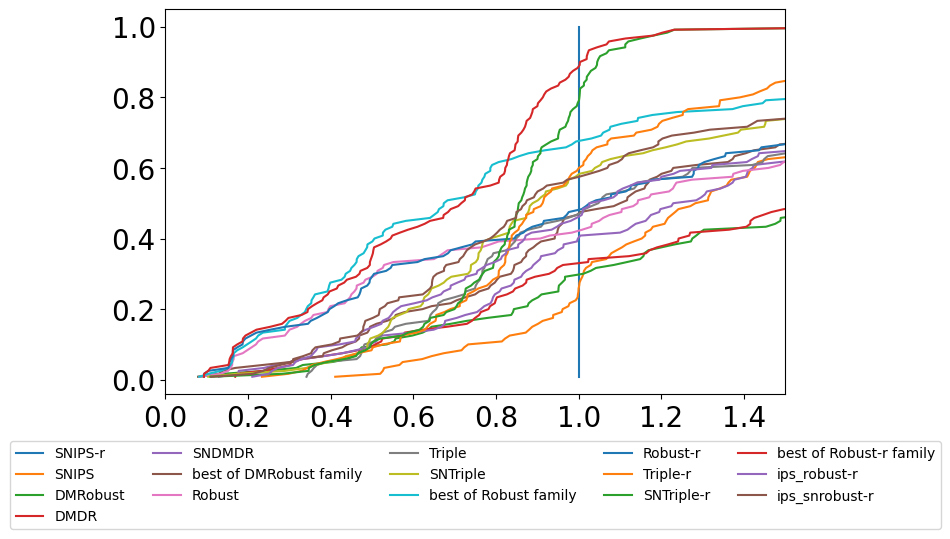

In [61]:
for i in range(1):


    print(file_list)
    
    dm_list = []
    dmdr_list = []
    sndmdr_list = []
    
    robust_list = []
    triple_list = []
    sntriple_list = []
    
    robust_r_list = []
    triple_r_list = []
    sntriple_r_list = []
    
    ips_triple_r_list = []
    ips_sntriple_r_list = []
    
    snips_list = []
    snips_nor_list = []
    
    
    
    
    
    min_robust_list = []
    min_dmrobust_list = []
    min_robust_r_list = []


    for file in file_list:

        data = pd.read_csv(path + file)

        snips_nor = list(data.iloc[1,:])[2:]
        snips = list(data.iloc[3,:])[2:]
        
        
        dm = list(data.iloc[4,:])[2:]
        dmdr = list(data.iloc[5,:])[2:]
        sndmdr = list(data.iloc[6,:])[2:]
        
        robust = list(data.iloc[7,:])[2:]
        triple = list(data.iloc[8,:])[2:]
        sntriple = list(data.iloc[9,:])[2:]
        
        robust_r = list(data.iloc[10,:])[2:]
        triple_r = list(data.iloc[11,:])[2:]
        sntriple_r = list(data.iloc[12,:])[2:]

        ips_triple_r = list(data.iloc[13,:])[2:]
        ips_sntriple_r = list(data.iloc[14,:])[2:]
        



        sntriple_w = np.array(dm)/np.array(snips)
        dm_list += list(sntriple_w)

        sntriple_w = np.array(dmdr)/np.array(snips)
        dmdr_list += list(sntriple_w)
        
        sntriple_w = np.array(sndmdr)/np.array(snips)
        sndmdr_list += list(sntriple_w)

        sntriple_w = np.array(robust)/np.array(snips)
        robust_list += list(sntriple_w)

        sntriple_w = np.array(triple)/np.array(snips)
        triple_list += list(sntriple_w)
        
        sntriple_w = np.array(sntriple)/np.array(snips)
        sntriple_list += list(sntriple_w)
        
        
        
        sntriple_w = np.array(robust_r)/np.array(snips)
        robust_r_list += list(sntriple_w)

        sntriple_w = np.array(triple_r)/np.array(snips)
        triple_r_list += list(sntriple_w)
        
        sntriple_w = np.array(sntriple_r)/np.array(snips)
        sntriple_r_list += list(sntriple_w)
        
        
        
        sntriple_w = np.array(ips_triple_r)/np.array(snips)
        ips_triple_r_list += list(sntriple_w)
        
        sntriple_w = np.array(ips_sntriple_r)/np.array(snips)
        ips_sntriple_r_list += list(sntriple_w)
        
        
        

        sntriple_w = np.array(snips)/np.array(snips)
        snips_list += list(sntriple_w)
        sntriple_w = np.array(snips_nor)/np.array(snips)
        snips_nor_list += list(sntriple_w)

        
        triple1 = np.array(triple).reshape(len(triple),1)
        robust1 = np.array(robust).reshape(len(triple),1)
        sntriple1 = np.array(sntriple).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_robust_list += list(sntriple_w)
        
        triple1 = np.array(triple_r).reshape(len(triple),1)
        robust1 = np.array(robust_r).reshape(len(triple),1)
        sntriple1 = np.array(sntriple_r).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_robust_r_list += list(sntriple_w)
        
        triple1 = np.array(dm).reshape(len(triple),1)
        robust1 = np.array(dmdr).reshape(len(triple),1)
        sntriple1 = np.array(sndmdr).reshape(len(triple),1)
        c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
        c = np.min(c,axis = 1)
        sntriple_w = c/np.array(snips)
        min_dmrobust_list += list(sntriple_w)




    

    dm_list.sort()
    dmdr_list.sort()
    sndmdr_list.sort()

    robust_list.sort()
    triple_list.sort()
    sntriple_list.sort()
    
    robust_r_list.sort()
    triple_r_list.sort()
    sntriple_r_list.sort()
    
    snips_list.sort()
    snips_nor_list.sort()
    min_robust_list.sort()
    min_dmrobust_list.sort()
    min_robust_r_list.sort()
    ips_triple_r_list.sort()
    ips_sntriple_r_list.sort()
    
    


    y = []
    for i in range(len(sntriple_list)):
        y.append((i+1)/len(sntriple_list))
#     dm0_list = []
#     dr_list = []
#     sndr_list = []
#     min_dm_list = []
#     for f in dm_file_list:
#         data = pd.read_csv('tune/' + f)
#         snips = list(data.iloc[1,:])[2:]
#         dm = list(data.iloc[2,:])[2:]
#         dr = list(data.iloc[3,:])[2:]
#         sndr = list(data.iloc[4,:])[2:]


#         sntriple_w = np.array(dm)/np.array(snips)
#         dm0_list += list(sntriple_w)

#         sntriple_w = np.array(dr)/np.array(snips)
#         dr_list += list(sntriple_w)

#         sntriple_w = np.array(sndr)/np.array(snips)
#         sndr_list += list(sntriple_w)

#         triple1 = np.array(dm).reshape(len(dm),1)
#         robust1 = np.array(dr).reshape(len(dm),1)
#         sntriple1 = np.array(sndr).reshape(len(dm),1)
#         c = np.concatenate((triple1,robust1,sntriple1),axis = 1)
#         c = np.min(c,axis = 1)
#         sntriple_w = c/np.array(snips)
#         min_dm_list += list(sntriple_w)


#     dm0_list.sort()
#     dr_list.sort()
#     sndr_list.sort()
#     min_dm_list.sort()
#     y_dm = []
#     for i in range(len(dm0_list)):
#         y_dm.append((i+1)/len(dm0_list))




    plt.figure(figsize=(8,5))


    plt.plot(snips_list,y)
    plt.plot(snips_nor_list,y)
    
    

#     plt.plot(dm0_list,y_dm)
#     plt.plot(np.array(dr_list),y_dm)
#     plt.plot(np.array(sndr_list),y_dm)
#     plt.plot(min_dm_list,y_dm)



    plt.plot(dm_list,y)
    plt.plot(np.array(dmdr_list),y)
    plt.plot(np.array(sndmdr_list),y)
    plt.plot(min_dmrobust_list,y)

    plt.plot(robust_list,y)
    plt.plot(triple_list,y)
    plt.plot(sntriple_list,y)
    plt.plot(min_robust_list,y)
    
    plt.plot(robust_r_list,y)
    plt.plot(triple_r_list,y)
    plt.plot(sntriple_r_list,y)
    plt.plot(min_robust_r_list,y)
    
    plt.plot(ips_triple_r_list,y)
    plt.plot(ips_sntriple_r_list,y)





    # plt.plot(dmo_list,y_dm)

    # plt.plot(dr_list,y_dm)
    # plt.plot(sndr_list,y_dm)

    plt.xlim((0, 1.5))

    plt.xticks( size = 20)
    plt.yticks( size = 20)




    plt.legend(['SNIPS-r','SNIPS','DMRobust','DMDR','SNDMDR','best of DMRobust family','Robust','Triple','SNTriple',\
                'best of Robust family','Robust-r','Triple-r','SNTriple-r',\
                'best of Robust-r family', 'ips_robust-r','ips_snrobust-r',\
                ], bbox_to_anchor=(0.5, -0.35) ,borderaxespad = 0., loc=8,ncol=5)
    plt.savefig('plot_pdf/largexshift_softentrained_balanced_dataset.pdf',dpi=600,bbox_inches = 'tight')
#     plt.show()

In [62]:
data

Unnamed: 0                   model  [0.95, 0.1, 0]_1_[15, 1, 0]  \
0            0               known ips                      0.36063   
1            1             known snips                      0.37525   
2            2             known ips-r                      0.15258   
3            3           known snips-r                      0.12400   
4            4          known dmrobust                      0.28960   
5            5              known dmdr                      0.27001   
6            6            known sndmdr                      0.27057   
7            7            known robust                      0.31388   
8            8            known triple                      0.27986   
9            9          known sntriple                      0.27909   
10          10          known robust-r                      0.26762   
11          11          known triple-r                      0.13258   
12          12        known sntriple-r                      0.11784   
13          13    known triple-robustr                      0.23330   
14          14  known sntriple-robustr                      0.23317   

    [0.95, 0.1, 0]_1_[9, 1, 0]  [0.95, 0.1, 0]_1_[6, 1, 0]  \
0                      0.29420                     0.24790   
1                      0.29666                     0.24666   
2                      0.11020                     0.07330   
3                      0.10717                     0.07663   
4                      0.27246                     0.25878   
5                      0.22294                     0.20716   
6                      0.22414                     0.20887   
7                      0.26780                     0.27957   
8                      0.22019                     0.21128   
9                      0.22076                     0.21220   
10                     0.25816                     0.26080   
11                     0.11464                     0.10275   
12                     0.09999                     0.07851   
13                     0.18042                     0.17757   
14                     0.17977                     0.17842   

    [0.95, 0.1, 0]_1_[4, 1, 0]  [0.95, 0.1, 0]_1_[1.5, 2, 1]  \
0                      0.19787                       0.10427   
1                      0.20306                       0.10593   
2                      0.07187                       0.11654   
3                      0.07177                       0.08743   
4                      0.24057                       0.14076   
5                      0.19144                       0.12639   
6                      0.19067                       0.11899   
7                      0.26339                       0.13079   
8                      0.15204                       0.11048   
9                      0.15173                       0.10824   
10                     0.23410                       0.07762   
11                     0.08571                       0.09960   
12                     0.07701                       0.09097   
13                     0.13252                       0.08828   
14                     0.13167                       0.08499   

    [0.95, 0.1, 0]_1_[0.6, 2, 1]  [0.7, 0.1, 0]_1_[15, 1, 0]  \
0                        0.14047                     0.33600   
1                        0.14291                     0.34457   
2                        0.13998                     0.16519   
3                        0.10439                     0.10500   
4                        0.06497                     0.26993   
5                        0.28174                     0.27611   
6                        0.28017                     0.27763   
7                        0.06781                     0.30752   
8                        0.24861                     0.28740   
9                        0.25004                     0.28642   
10                       0.17192                     0.24739   
11                       0.12552                     0.15949   
12               